### Author: Tanvi Bhagat

## Importing Packages

### AIM: To understand people's buying pattern of disney subscription and predict disney subscription transaction

In [120]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pylab 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

from pylab import rcParams

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

### Acquiring Data and Performing Modifications

In [14]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vRBEQLgZ8pocw4jnXJ7H0OaDAYL4iAhpA57ZWNSqUgwTs2lk0XCGiq2hBFXrtCUny1VAHmGjBBtP7sK/pub?gid=242143577&single=true&output=csv"
disney= pd.read_csv(data_path)

In [3]:
disney.head(2)

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
0,653,0,25000,1,0,0,0,0,0,1,0,1,0,1,0,0
1,546,0,7000,0,0,0,0,0,0,1,1,1,1,1,0,0


In [4]:
disney.tail(2)

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
503,47,0,55000,0,1,0,0,0,0,0,0,0,1,1,0,0
504,590,0,53000,0,0,0,1,0,0,1,0,1,0,1,0,0


In [5]:
list(disney)

['row',
 'transaction',
 'salary_usd',
 'is_male',
 'is_married',
 'is_college',
 'is_professional',
 'is_senior',
 'is_employed',
 'is_single_income',
 'children_present',
 'is_renter',
 'lives_in_house',
 'is_english_primary_language',
 'previously_disney_customer',
 'previous_streaming_service_customer']

In [6]:
Nunique = disney.nunique()
Nunique = Nunique.sort_values()
Nunique

transaction                              2
is_male                                  2
is_married                               2
is_college                               2
is_professional                          2
is_senior                                2
is_employed                              2
is_single_income                         2
children_present                         2
is_renter                                2
lives_in_house                           2
is_english_primary_language              2
previously_disney_customer               2
previous_streaming_service_customer      2
salary_usd                              72
row                                    505
dtype: int64

#### Checking for missing values

In [7]:
round(100*(disney.isnull().sum()/len(disney.index)), 2)

row                                    0.0
transaction                            0.0
salary_usd                             0.0
is_male                                0.0
is_married                             0.0
is_college                             0.0
is_professional                        0.0
is_senior                              0.0
is_employed                            0.0
is_single_income                       0.0
children_present                       0.0
is_renter                              0.0
lives_in_house                         0.0
is_english_primary_language            0.0
previously_disney_customer             0.0
previous_streaming_service_customer    0.0
dtype: float64

### Describing Quantitative Variables

In [8]:
disney.describe()

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,337.425743,0.186139,58223.762376,0.443564,0.366337,0.308911,0.352475,0.063366,0.029703,0.762376,0.364356,0.605941,0.673267,0.900990,0.075248,0.079208
std,196.318960,0.389604,39098.058320,0.497297,0.482281,0.462502,0.478215,0.243862,0.169935,0.426049,0.481726,0.489132,0.469484,0.298971,0.264052,0.270331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,338.000000,0.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,506.000000,0.000000,86000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,672.000000,1.000000,124000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print(disney.shape)
print(list(disney.columns))

(505, 16)
['row', 'transaction', 'salary_usd', 'is_male', 'is_married', 'is_college', 'is_professional', 'is_senior', 'is_employed', 'is_single_income', 'children_present', 'is_renter', 'lives_in_house', 'is_english_primary_language', 'previously_disney_customer', 'previous_streaming_service_customer']


### Plotting countplots for the categorical variables

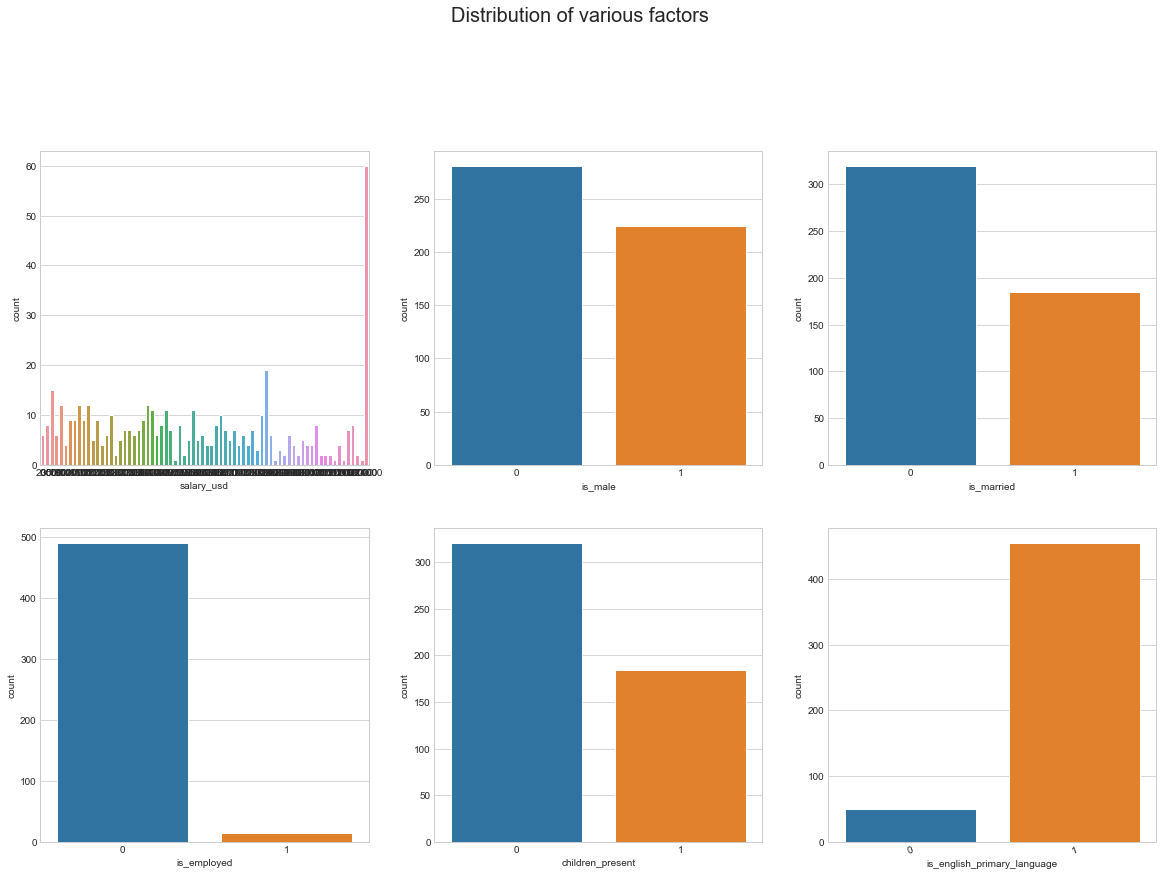

In [15]:
fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(disney['salary_usd'], ax = ax[0,0]) 
sns.countplot(disney['is_male'], ax = ax[0,1]) 
sns.countplot(disney['is_married'], ax = ax[0,2]) 
sns.countplot(disney['is_employed'], ax = ax[1,0])
sns.countplot(disney['children_present'], ax = ax[1,1])  
sns.countplot(disney['is_english_primary_language'], ax = ax[1,2])  
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

### Feature Selection: The scores displayed below identifies the important features.

In [16]:
X =disney.iloc[:,disney.columns != 'transaction' ]
y =disney.transaction
X.head()
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Disney','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features

                                 Disney         Score
1                            salary_usd  6.019215e+06
3                            is_married  5.034928e+01
10                            is_renter  2.946581e+01
5                       is_professional  2.112519e+01
4                            is_college  1.859386e+01
8                      is_single_income  1.312086e+01
13           previously_disney_customer  1.091485e+01
11                       lives_in_house  7.544560e+00
0                                   row  4.478699e+00
7                           is_employed  3.430657e+00
14  previous_streaming_service_customer  3.423151e+00
2                               is_male  2.227969e+00
6                             is_senior  7.895765e-01
12          is_english_primary_language  7.745896e-01
9                      children_present  2.020649e-02


### Based on the above score, I have decided to skip some columns which are not relevant to predict the transaction of disney subscriptions.

In [75]:
disney_2= disney[['row','transaction','salary_usd','is_married','is_college','is_renter','lives_in_house','is_single_income','is_professional','is_english_primary_language','is_senior','is_employed']].copy()

#### Getting correlations of selected  features from dataset by displaying a heatmap.

Text(0.5, 1, 'Correlation plot')

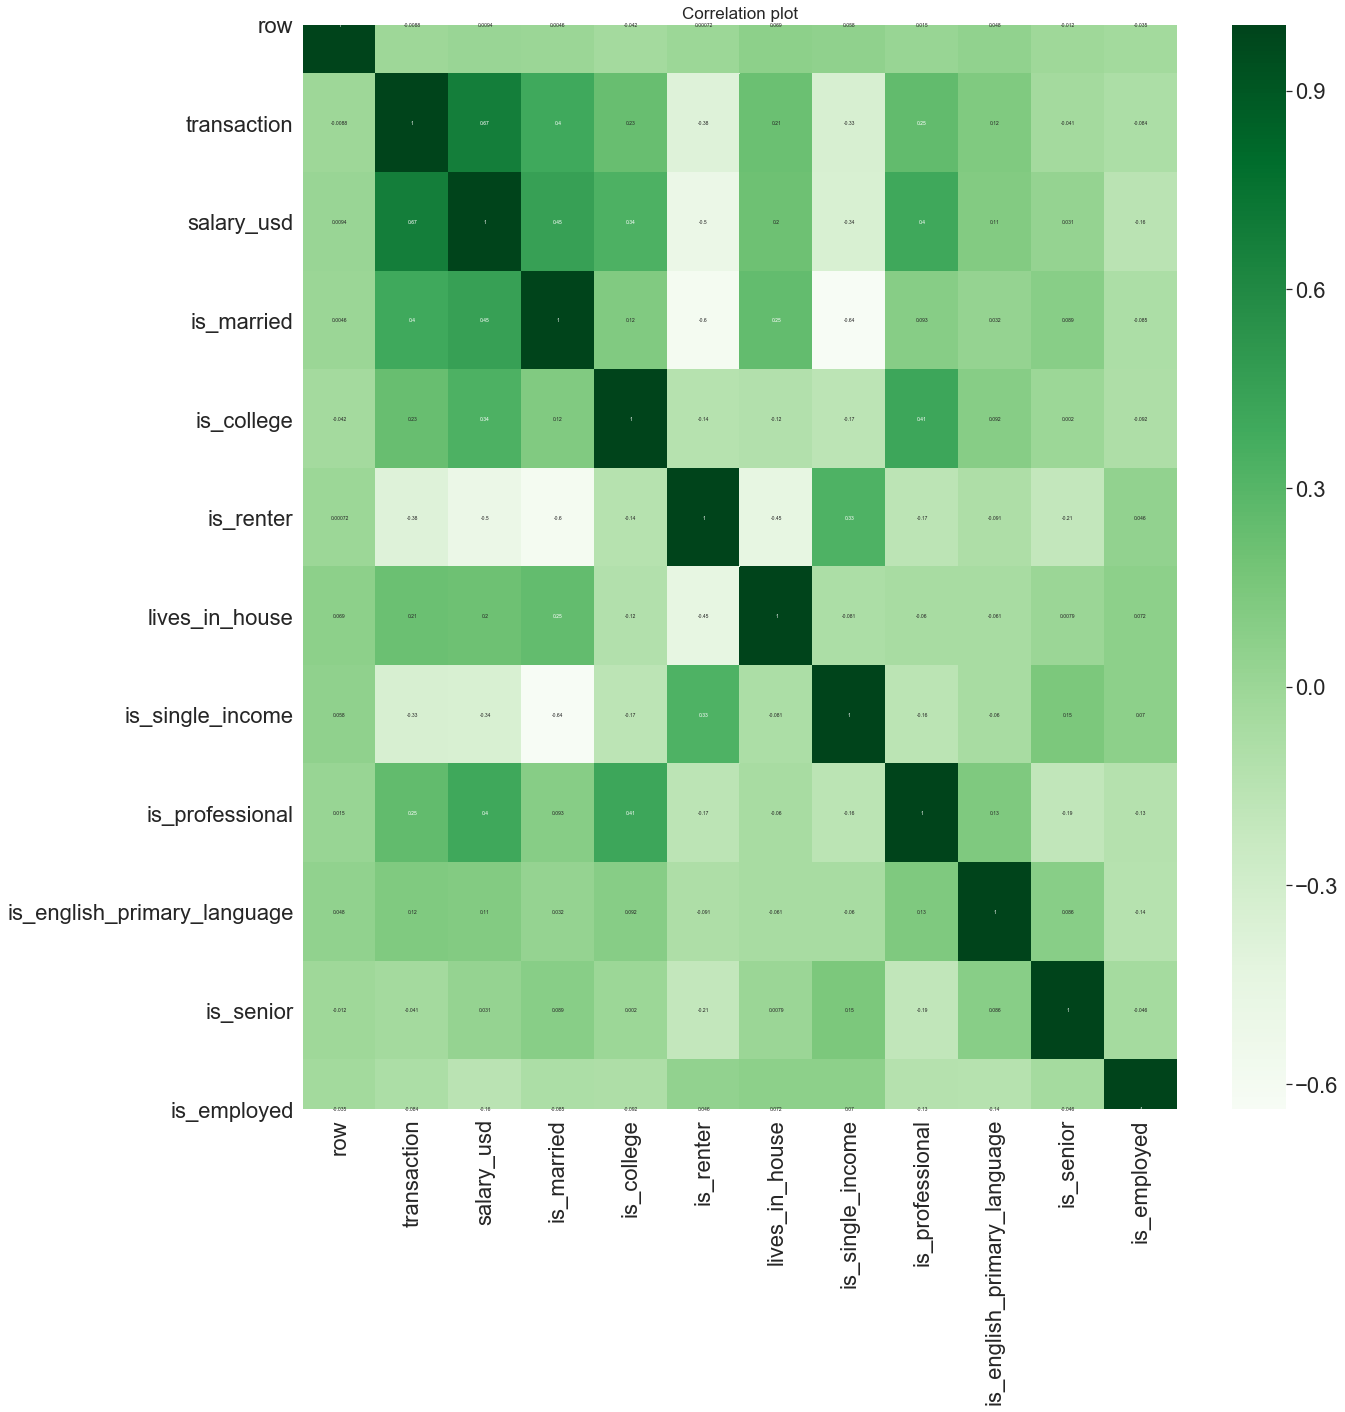

In [109]:
corrmat = disney_2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

sns.set(font_scale=2)

ax=sns.heatmap(disney_2[top_corr_features].corr(),annot=True,cmap="Greens", annot_kws={"size":5})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Correlation plot',fontsize=17)

In [77]:
disney.transaction.head(8)

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    0
Name: transaction, dtype: int64

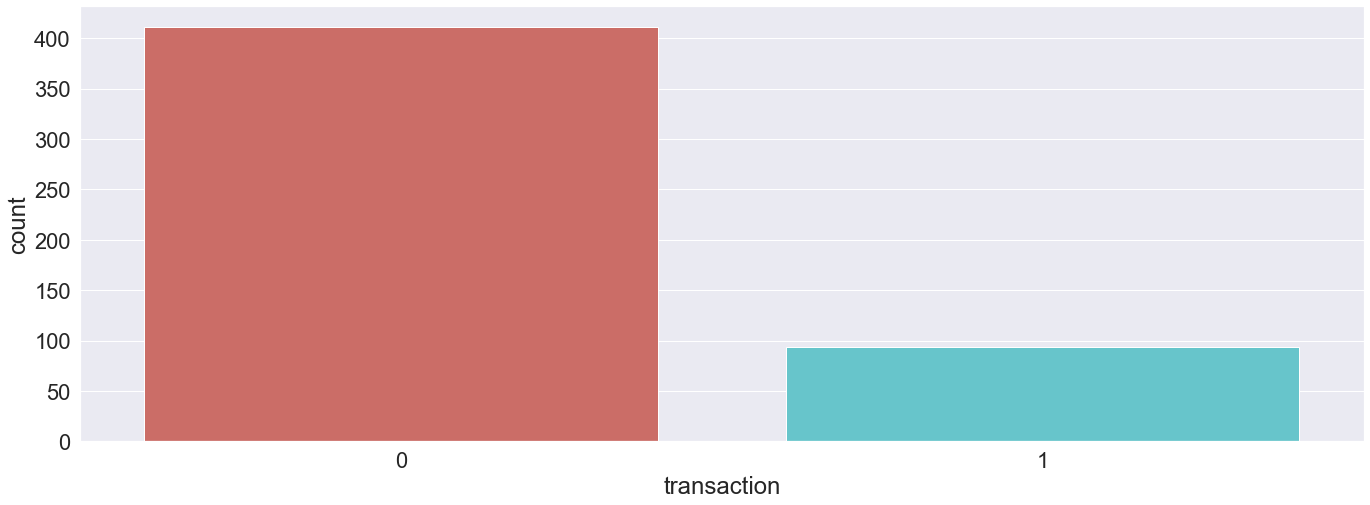

In [78]:
disney.transaction.value_counts()
sns.countplot(x = 'transaction', data = disney, palette = 'hls')
plt.show()

#### We see that the count for transaction is way too much compared to the non-transaction. It means it is an imbalanced dataset and hence I will be using SMOTE technique while implementing logistic regression later in the code.

In [116]:
TransactionRate=disney.transaction.value_counts()/len(disney)
TransactionRate

0    0.813861
1    0.186139
Name: transaction, dtype: float64

#### By looking at the above countplot, it is understood that there are 81% transactions done and 18% transactions are not done for the disney subscriptions.

#### Overview of summary (Transaction V.S. Non-Transaction)

In [117]:
Transaction_Summary = disney.groupby('transaction')
Transaction_Summary.mean()

,row,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
transaction,,,,,,,,,,,,,,,
0,338.253041,45625.304136,0.464720,0.274939,0.257908,0.294404,0.068127,0.036496,0.829684,0.36253,0.695864,0.625304,0.883212,0.055961,0.068127
1,333.808511,113308.510638,0.351064,0.765957,0.531915,0.606383,0.042553,0.000000,0.468085,0.37234,0.212766,0.882979,0.978723,0.159574,0.127660


### Transaction vs Salary

### Distribution of salary and transaction

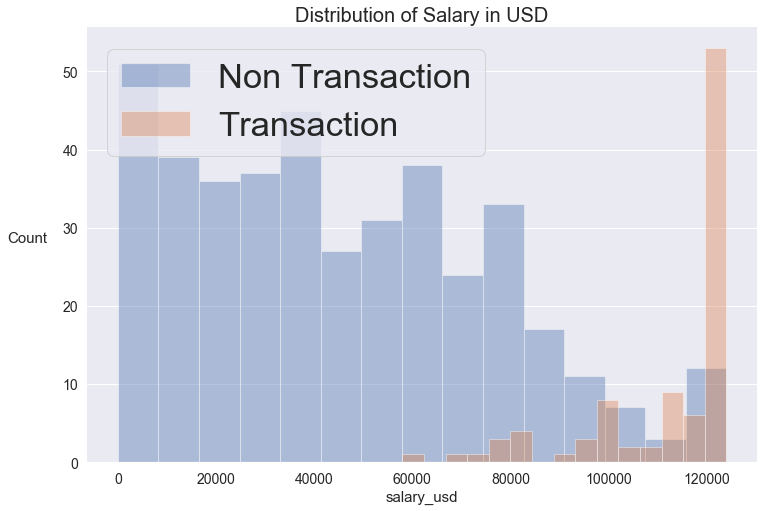

In [118]:
plt.figure(figsize=(12,8))

fig = sns.distplot(disney[disney['transaction'] == 0]['salary_usd'], label='Non Transaction', kde=0, bins=15)
sns.distplot(disney[disney['transaction'] == 1]['salary_usd'], label='Transaction', kde=0, bins=15)

sns.despine(left=1)
fig.grid(axis='x')

plt.xlabel('salary_usd',fontsize=15)
plt.ylabel('Count',fontsize=15, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Salary in USD',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()

- 1. By looking at the above distplot, we can see that the people who have salary more that 60000USD tend to buy the disney subscriptions and less than 60000USD do not tend to buy the subscription.
- 2. Highest number of disney subscription rate can be observed amongst people who have 120000USD as their salary.

## Logistic Regression

In [112]:
X = np.array(disney_2.loc[:,disney_2.columns != 'transaction'])
y = np.array(disney_2.loc[:,disney_2.columns == 'transaction'])

In [113]:
X

array([[  653, 25000,     0, ...,     1,     0,     0],
       [  546,  7000,     0, ...,     1,     0,     0],
       [  463, 25000,     0, ...,     1,     0,     0],
       ...,
       [  148, 10000,     0, ...,     1,     0,     1],
       [   47, 55000,     1, ...,     1,     0,     0],
       [  590, 53000,     0, ...,     1,     0,     0]])

In [114]:
X.shape

(505, 11)

In [115]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (505, 11)
Shape of y: (505, 1)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (353, 11)
Number transactions y_train dataset:  (353, 1)
Number transactions X_test dataset:  (152, 11)
Number transactions y_test dataset:  (152, 1)


In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': [68]
Before OverSampling, counts of label '0': [285] 



## SMOTE: Synthetic Minority Over-sampling Technique

In [89]:
smote = SMOTE(random_state=2)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train.ravel())
X_test_res, y_test_res = smote.fit_sample(X_test,y_test)

In [90]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test_res)

### Calculating Accuracy

In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_res, y_test_res)))

Accuracy of logistic regression classifier on test set: 0.95


### Cross Validation Prediction and score

In [121]:
cv_pred = cross_val_predict(logreg,X_test_res,y_test_res,cv=5)
cv_score = cross_val_score(logreg,X_test_res,y_test_res,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8884705882352939


### Confusion Matrix

In [92]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix



array([[118,   8],
       [  4, 122]])

<P>=>True Positive(TP)= 118</P>
<P>=>True Negative(TN)= 122</P>
<P>=>False Positive(FP)= 8</P>
<P>=>False Negative(NP)= 4</P>}

Text(0.5, 510.88, 'Predicted label')

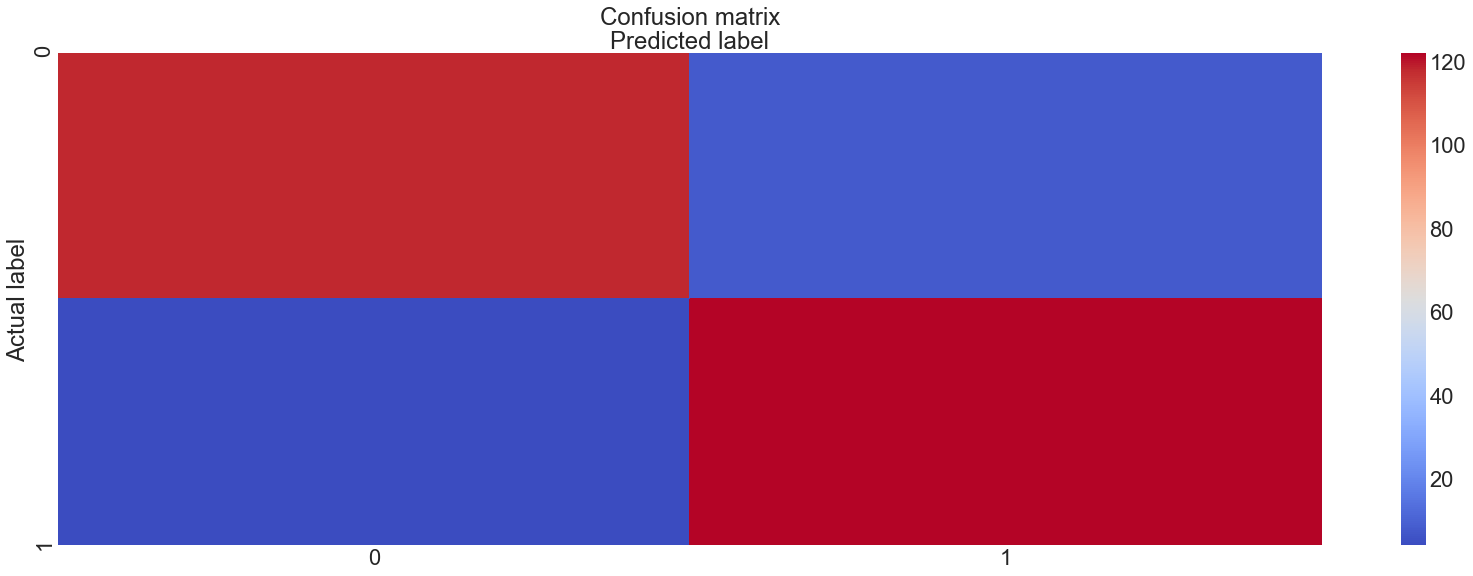

In [123]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## ROC

ROC score is: 0.9523809523809524


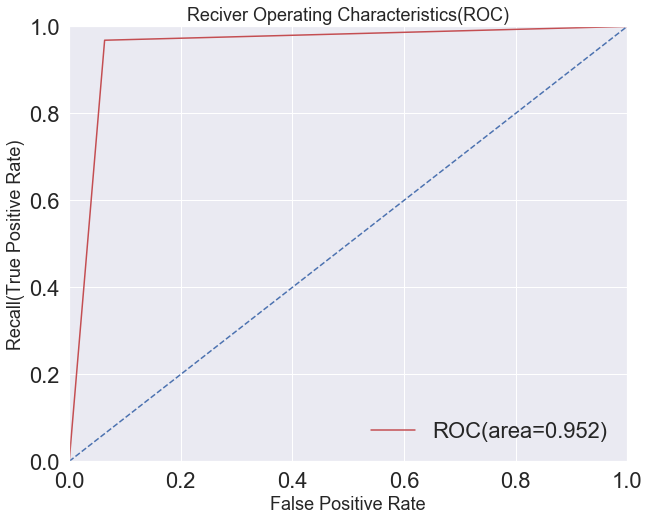

AUC: 0.9523809523809524


In [94]:
roc_score = roc_auc_score(y_test_res,y_pred)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test_res,y_pred)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'r',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'b--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

In [95]:
logreg.predict(X_test_res)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
logreg.score(X_test_res,y_test_res)

0.9523809523809523

In [97]:
logreg.predict_proba(X_test_res)

array([[9.94268334e-01, 5.73166555e-03],
       [9.98331635e-01, 1.66836506e-03],
       [9.99367429e-01, 6.32570719e-04],
       [9.94837390e-01, 5.16260989e-03],
       [9.99116994e-01, 8.83006090e-04],
       [9.75505782e-01, 2.44942176e-02],
       [9.33690951e-01, 6.63090490e-02],
       [1.63508043e-01, 8.36491957e-01],
       [8.67642980e-01, 1.32357020e-01],
       [9.93777790e-01, 6.22220973e-03],
       [9.98419482e-01, 1.58051833e-03],
       [1.86445670e-01, 8.13554330e-01],
       [9.75376612e-01, 2.46233879e-02],
       [9.83166011e-01, 1.68339892e-02],
       [9.99081893e-01, 9.18107100e-04],
       [9.25616023e-01, 7.43839766e-02],
       [5.32576116e-01, 4.67423884e-01],
       [2.11291321e-01, 7.88708679e-01],
       [9.86725462e-01, 1.32745375e-02],
       [8.20002402e-01, 1.79997598e-01],
       [9.99125977e-01, 8.74023425e-04],
       [8.44474478e-01, 1.55525522e-01],
       [9.90948302e-01, 9.05169764e-03],
       [9.85773229e-01, 1.42267709e-02],
       [9.959797

In [104]:
arbitrary_values1 = pd.DataFrame(data = {'row':[93,672,463,546,672]})
arbitrary_values1.index

RangeIndex(start=0, stop=5, step=1)

In [105]:
disney_2.head(6)

,row,transaction,salary_usd,is_married,is_college,is_renter,lives_in_house,is_single_income,is_professional,is_english_primary_language,is_senior,is_employed
0,653,0,25000,0,0,1,0,1,0,1,0,0
1,546,0,7000,0,0,1,1,1,0,1,0,0
2,463,0,25000,0,0,1,0,1,1,1,0,0
3,93,1,124000,1,1,0,1,0,1,1,0,0
4,672,1,84000,1,0,0,1,0,1,1,0,0
5,273,0,66000,0,1,1,0,1,0,0,0,0


In [107]:
#Now, let's use the model to predict funeral plot purchases for arbitray values
arbitrary_values1 = pd.DataFrame(data = {'row':[93,672,463,546,672]})
arbitrary_values2 = pd.DataFrame(data = {'salary_usd': [7000,124000,84000,25000,124000]})
arbitrary_values3 = pd.DataFrame(data = {'is_married':[0,1,0,1,0]})
arbitrary_values4 = pd.DataFrame(data = {'is_college':[0,1,0,1,1]})
arbitrary_values5 = pd.DataFrame(data = {'is_professional': [0,1,1,1,1]})
arbitrary_values6 = pd.DataFrame(data = {'is_senior':[0,0,1,1,0]})
arbitrary_values7 = pd.DataFrame(data = {'is_employed':[1,1,0,0,1]})
arbitrary_values8 = pd.DataFrame(data = {'is_single_income': [1,1,0,1,1]})
arbitrary_values9 = pd.DataFrame(data = {'is_renter':[0,1,0,1,1]})
arbitrary_values10 = pd.DataFrame(data = {'lives_in_house':[0,1,1,1,1]})
arbitrary_values11 = pd.DataFrame(data = {'is_english_primary_language':[1,0,0,1,1]})


arbitrary_values_merged = arbitrary_values1.join(arbitrary_values2).join(arbitrary_values3).join(arbitrary_values4).join(arbitrary_values5).join(arbitrary_values6).join(arbitrary_values7).join(arbitrary_values8).join(arbitrary_values9).join(arbitrary_values10).join(arbitrary_values11).set_index([pd.Index(arbitrary_values1.index)])
arbitrary_values_merged

final_df = arbitrary_values_merged.join(pd.DataFrame(logreg.predict(arbitrary_values_merged), columns = {'Prediction'}).set_index([pd.Index(arbitrary_values_merged.index)]))
final_df

,row,salary_usd,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,is_renter,lives_in_house,is_english_primary_language,Prediction
0,93,7000,0,0,0,0,1,1,0,0,1,0
1,672,124000,1,1,1,0,1,1,1,1,0,0
2,463,84000,0,0,1,1,0,0,0,1,0,1
3,546,25000,1,1,1,1,0,1,1,1,1,0
4,672,124000,0,1,1,0,1,1,1,1,1,0


- 1. The above table contains predicted transaction values for different features.
- 2. We can observe that those who are having single income are not keen on buying the disney subscription.
- 3. We can also observe that the people who are married and have different salary range do not tend to buy the subscription.